# Group 9 Project : Bank Marketing Campaign

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset

bank_df = pd.read_excel("bank-full-2.xlsm")

bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bank_df.sample(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31236,38,admin.,married,secondary,no,2549,no,no,cellular,3,mar,103,1,-1,0,unknown,no
605,39,blue-collar,married,secondary,no,285,yes,yes,unknown,6,may,209,1,-1,0,unknown,no
20640,47,technician,married,tertiary,no,545,yes,no,cellular,12,aug,588,3,-1,0,unknown,no
17754,32,technician,married,secondary,no,-95,yes,no,cellular,29,jul,935,4,-1,0,unknown,no
21366,39,management,divorced,tertiary,no,3575,no,yes,cellular,18,aug,74,3,-1,0,unknown,no
5350,30,blue-collar,married,secondary,no,253,yes,no,unknown,23,may,160,2,-1,0,unknown,no
28885,46,blue-collar,married,primary,no,665,no,no,cellular,30,jan,89,4,235,2,failure,no
9977,40,unemployed,single,secondary,no,6,no,no,unknown,9,jun,134,3,-1,0,unknown,no
14972,25,blue-collar,single,secondary,no,195,no,no,cellular,16,jul,1339,3,-1,0,unknown,no
39106,38,entrepreneur,married,tertiary,no,170,yes,no,cellular,18,may,442,1,-1,0,unknown,yes


In [7]:
bank_df["contact"].value_counts()


contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

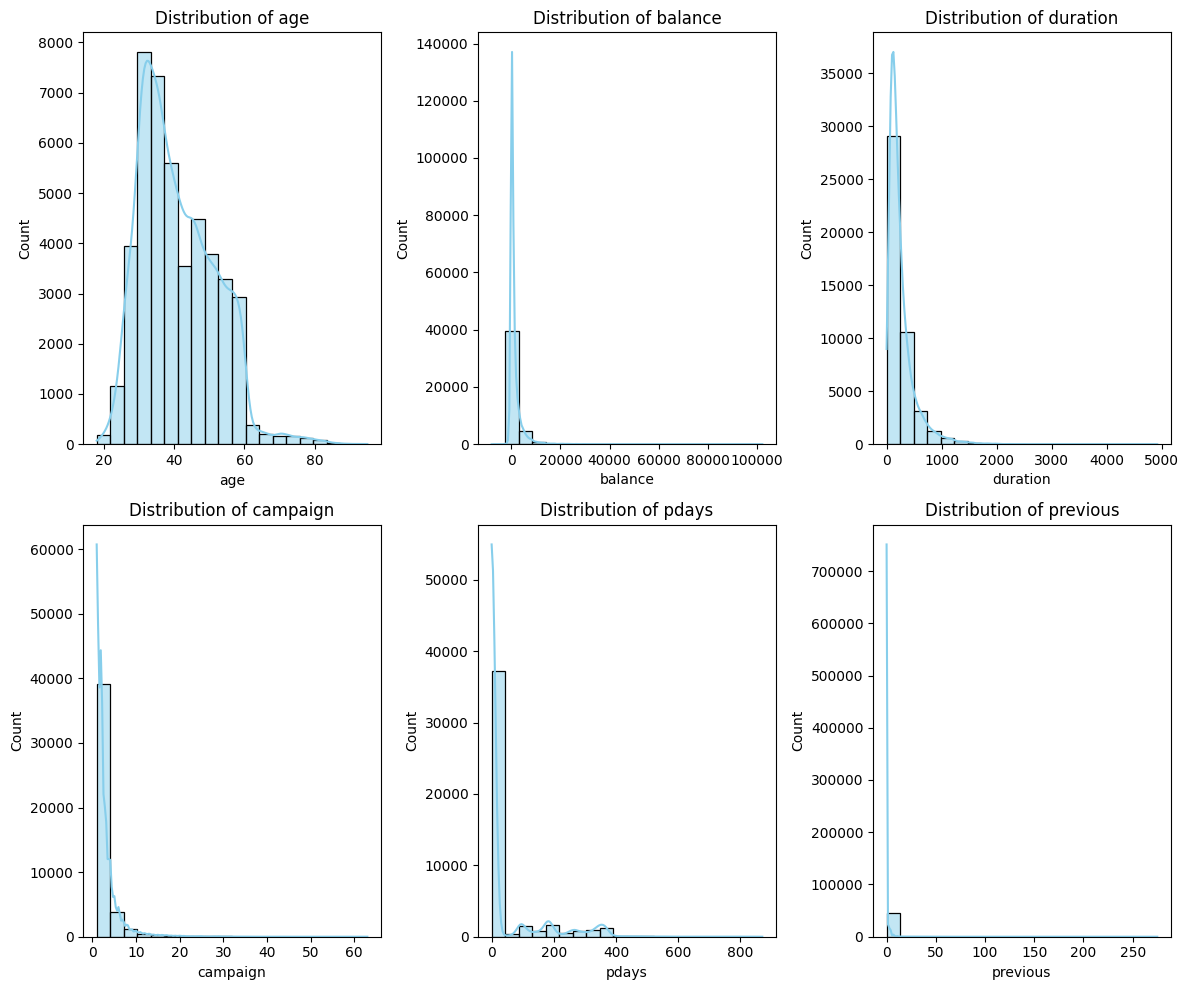

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/1009349816.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=bank_df, palette='Set2')


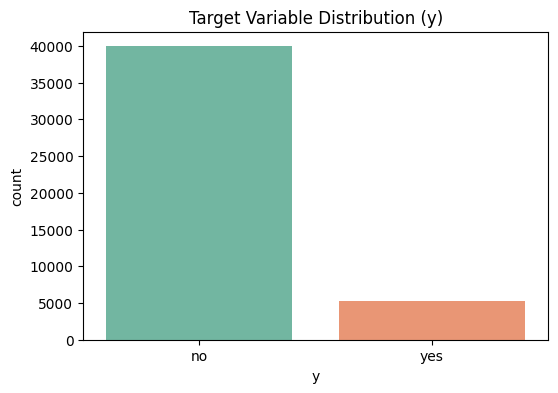

In [8]:
# Numerical columns for the histograms
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Plot histograms for numerical variables
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(bank_df[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Count plot for the target variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=bank_df, palette='Set2')
plt.title('Target Variable Distribution (y)')
plt.show()

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/1049724684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank_df, x=feature, palette="viridis")


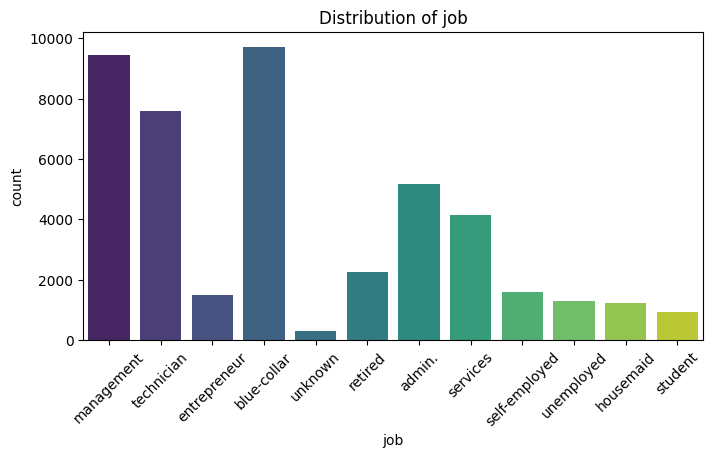

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/1049724684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank_df, x=feature, palette="viridis")


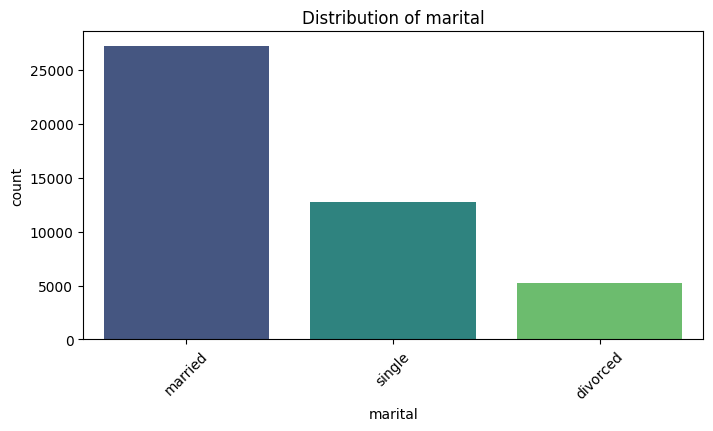

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/1049724684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank_df, x=feature, palette="viridis")


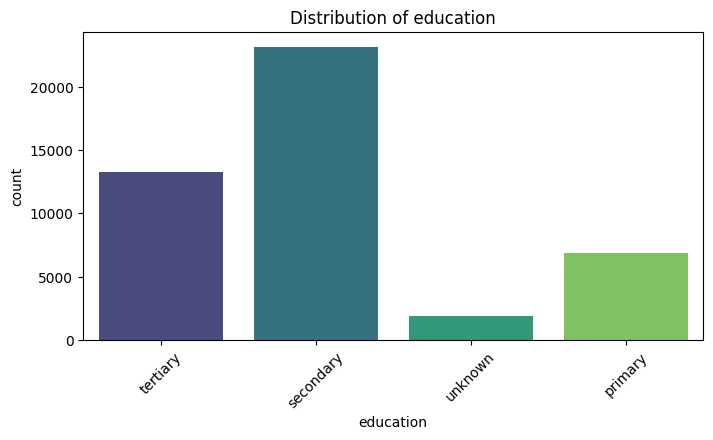

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/1049724684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank_df, x=feature, palette="viridis")


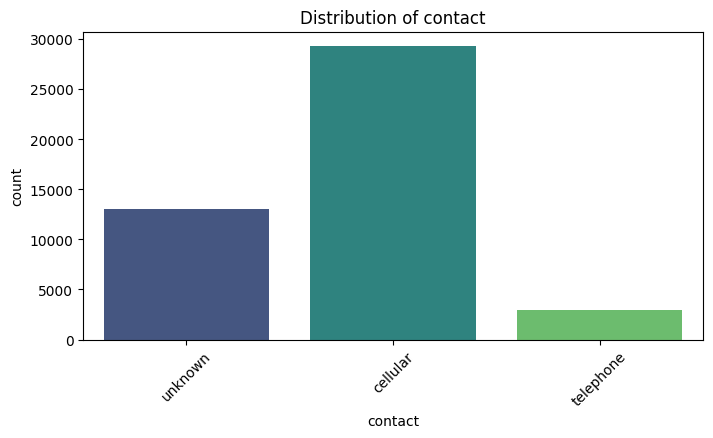

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/1049724684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank_df, x=feature, palette="viridis")


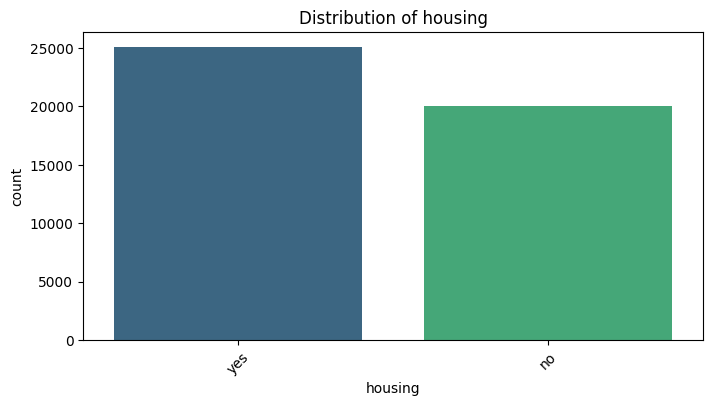

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/1049724684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank_df, x=feature, palette="viridis")


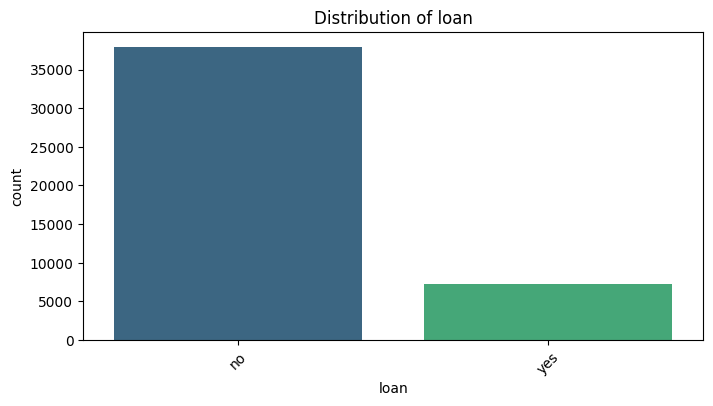

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/1049724684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank_df, x=feature, palette="viridis")


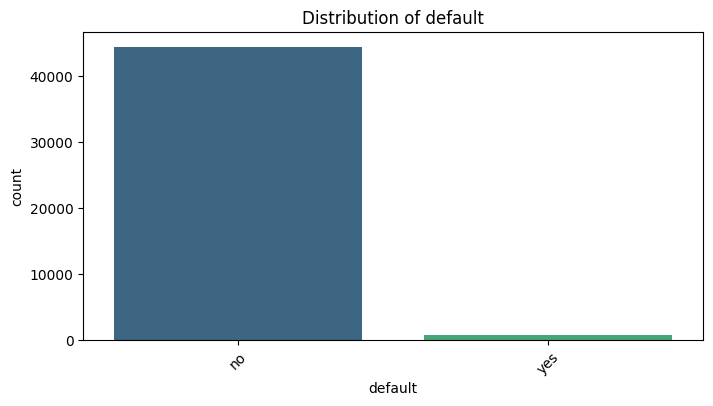

In [9]:
# Plotting count plots for categorical variables
categorical_features = ['job', 'marital', 'education', 'contact', 'housing', 'loan', 'default']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=bank_df, x=feature, palette="viridis")
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.show()


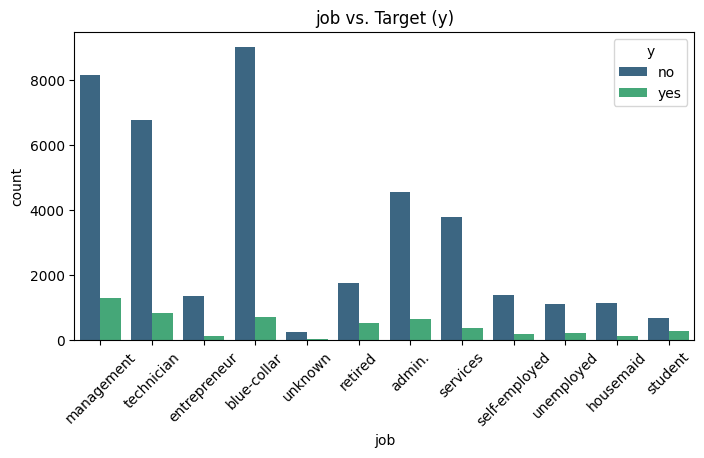

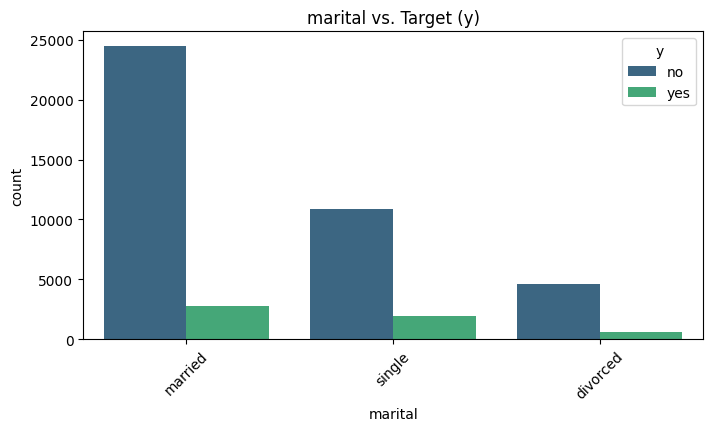

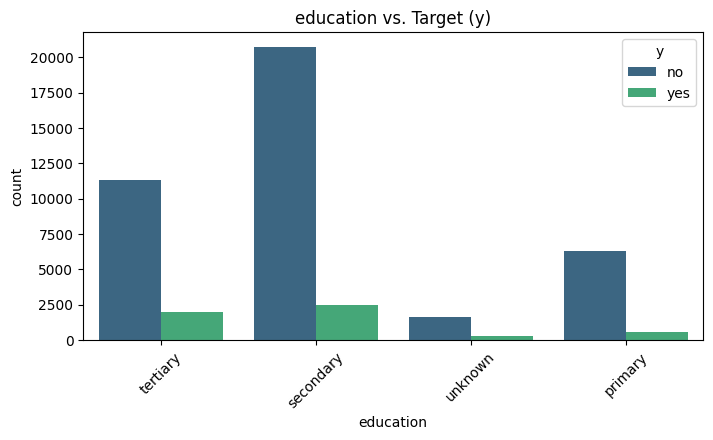

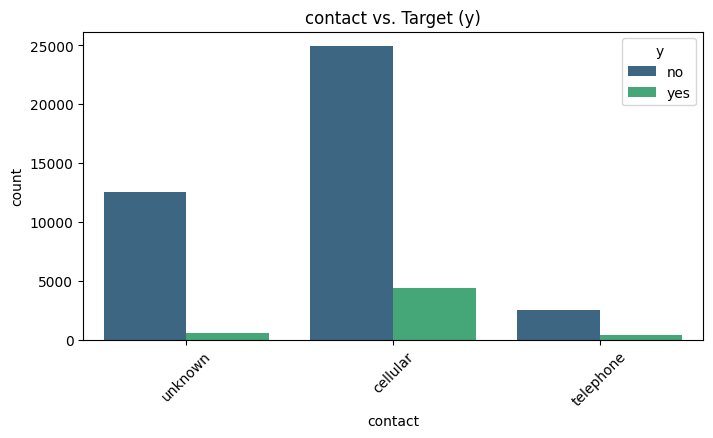

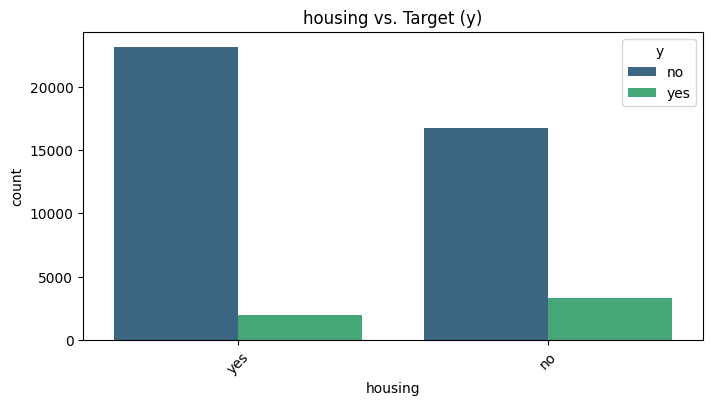

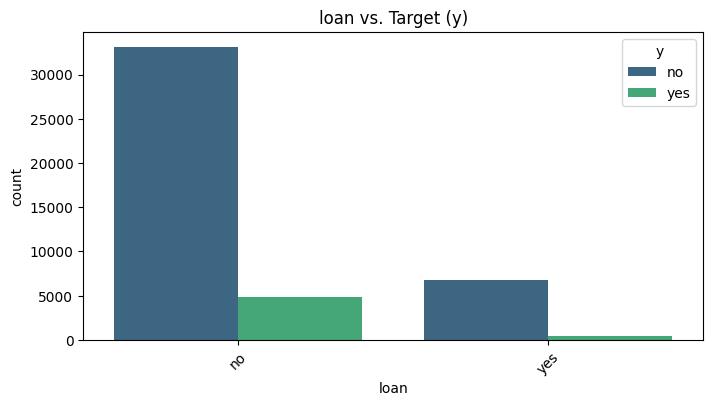

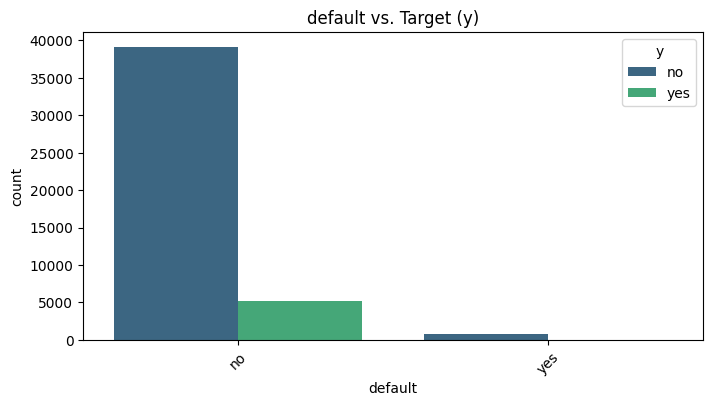

In [10]:
# Analyzing categorical features against the target variable
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=bank_df, x=feature, hue='y', palette="viridis")
    plt.title(f"{feature} vs. Target (y)")
    plt.xticks(rotation=45)
    plt.show()


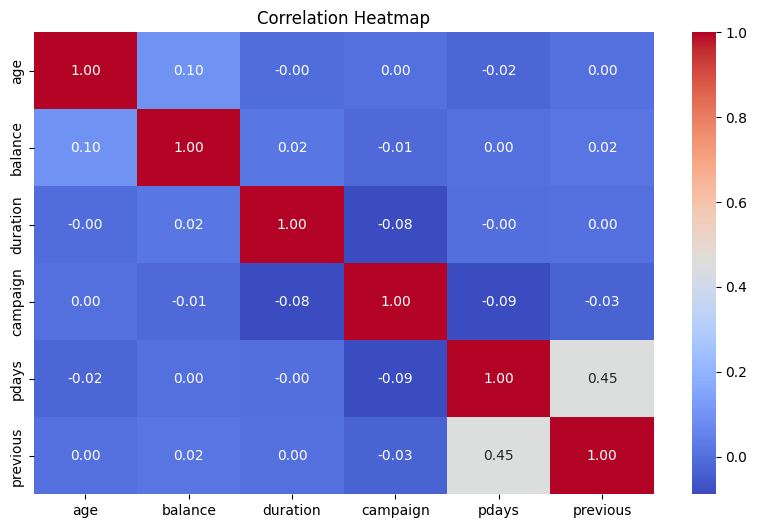

In [11]:
# Correlation heatmap
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(10, 6))
sns.heatmap(bank_df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### The heatmap shows little correlation between most features, therefore they are independent and therefore capture different aspects of the data.

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/3914127421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_df, x=feature, palette="coolwarm")


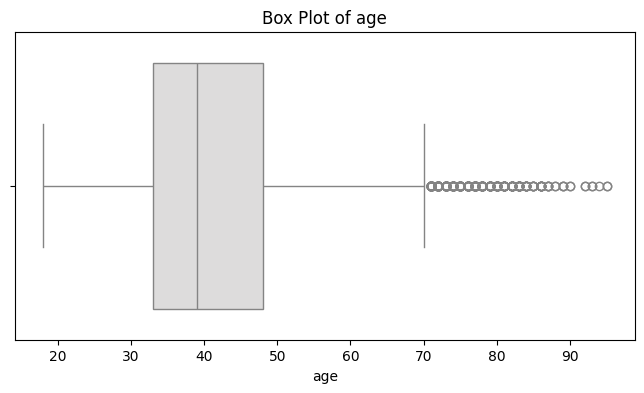

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/3914127421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_df, x=feature, palette="coolwarm")


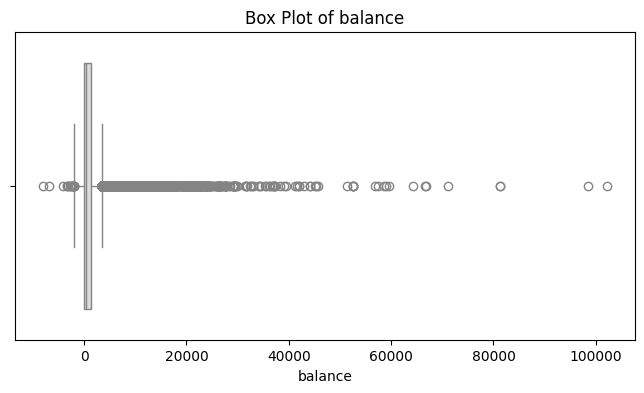

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/3914127421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_df, x=feature, palette="coolwarm")


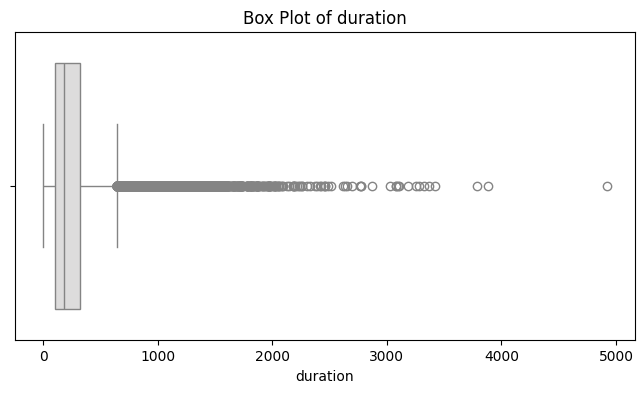

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/3914127421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_df, x=feature, palette="coolwarm")


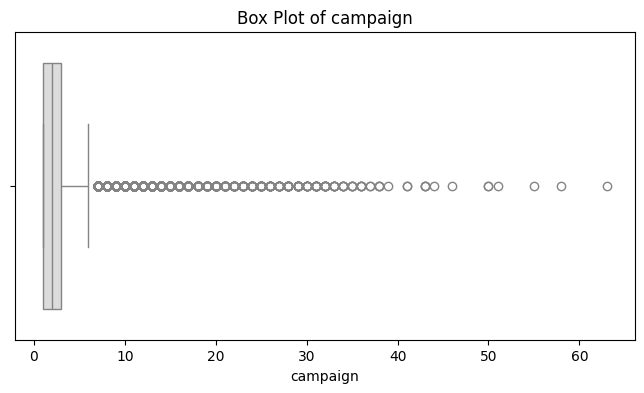

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/3914127421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_df, x=feature, palette="coolwarm")


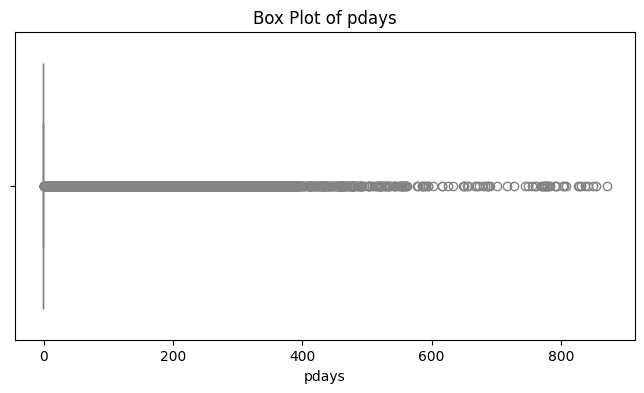

/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/3914127421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_df, x=feature, palette="coolwarm")


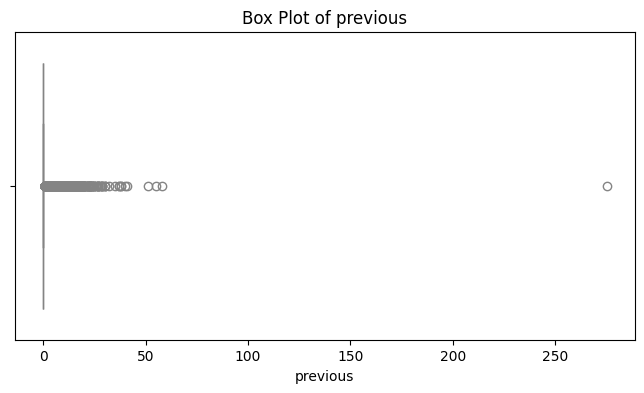

In [12]:
# Box plots for numeric features
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=bank_df, x=feature, palette="coolwarm")
    plt.title(f"Box Plot of {feature}")
    plt.show()


In [13]:
import pandas as pd

# Combine 'day' and 'month' into a 'date' column
bank_df['date'] = pd.to_datetime(bank_df['month'] + " " + bank_df['day'].astype(str) + " 2024")



/var/folders/q7/05ms4np542q73l40vscfx5kw0000gn/T/ipykernel_20044/97492647.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_df['date'] = pd.to_datetime(bank_df['month'] + " " + bank_df['day'].astype(str) + " 2024")


In [14]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,date
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,2024-05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2024-05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2024-05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,2024-05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,2024-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2024-11-17
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,2024-11-17
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,2024-11-17
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,2024-11-17


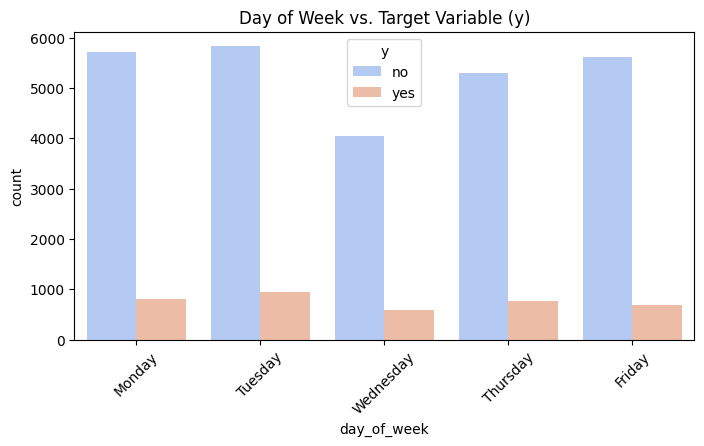

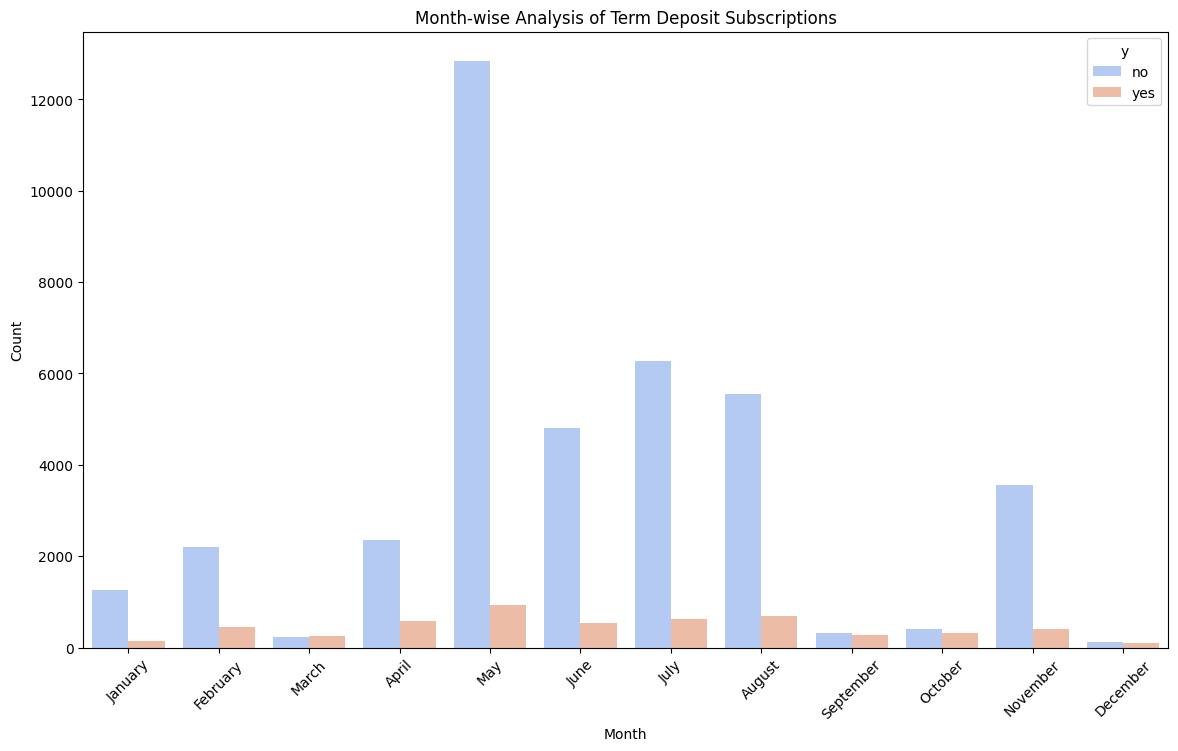

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'day' and 'month' columns already exist and the year is fixed at 2014

# Map the month column to proper month names for clarity
month_map = {
    'jan': 'January', 'feb': 'February', 'mar': 'March', 'apr': 'April',
    'may': 'May', 'jun': 'June', 'jul': 'July', 'aug': 'August',
    'sep': 'September', 'oct': 'October', 'nov': 'November', 'dec': 'December'
}
bank_df['month_name'] = bank_df['month'].str.lower().map(month_map)

# Recreate the 'day_of_week' column without creating a date column
day_of_week_map = {
    1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 
    6: 'Saturday', 7: 'Sunday'
}
bank_df['day_of_week'] = bank_df['day'] % 7  # Calculate day of the week numerically (approximation for simplicity)
bank_df['day_of_week'] = bank_df['day_of_week'].map(day_of_week_map)

# Ensure 'month_name' has a proper categorical order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
bank_df['month_name'] = pd.Categorical(bank_df['month_name'], categories=month_order, ordered=True)

# Plotting day_of_week vs. target variable
plt.figure(figsize=(8, 4))
sns.countplot(data=bank_df, x='day_of_week', hue='y', palette="coolwarm", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
plt.title("Day of Week vs. Target Variable (y)")
plt.xticks(rotation=45)
plt.show()

# Plotting month_name vs. target variable
plt.figure(figsize=(14, 8))
sns.countplot(data=bank_df, x='month_name', hue='y', palette="coolwarm", order=month_order)
plt.title("Month-wise Analysis of Term Deposit Subscriptions")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [16]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,date,month_name,day_of_week
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,2024-05-05,May,Friday
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2024-05-05,May,Friday
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2024-05-05,May,Friday
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,2024-05-05,May,Friday
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,2024-05-05,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2024-11-17,November,Wednesday
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,2024-11-17,November,Wednesday
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,2024-11-17,November,Wednesday
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,2024-11-17,November,Wednesday


In [17]:
# Create dummy variables for categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month_name']
bank_df_dummies = pd.get_dummies(bank_df[categorical_columns], drop_first=True)

# Merge the dummy variables with the original DataFrame without overwriting it
bank_df_encoded = pd.concat([bank_df, bank_df_dummies], axis=1)

# Drop the original categorical columns from bank_df_encoded if needed
bank_df_encoded.drop(columns=categorical_columns, inplace=True)


In [18]:
bank_df_encoded

,age,balance,day,month,duration,campaign,pdays,previous,poutcome,y,...,month_name_March,month_name_April,month_name_May,month_name_June,month_name_July,month_name_August,month_name_September,month_name_October,month_name_November,month_name_December
0,58,2143,5,may,261,1,-1,0,unknown,no,...,False,False,True,False,False,False,False,False,False,False
1,44,29,5,may,151,1,-1,0,unknown,no,...,False,False,True,False,False,False,False,False,False,False
2,33,2,5,may,76,1,-1,0,unknown,no,...,False,False,True,False,False,False,False,False,False,False
3,47,1506,5,may,92,1,-1,0,unknown,no,...,False,False,True,False,False,False,False,False,False,False
4,33,1,5,may,198,1,-1,0,unknown,no,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,nov,977,3,-1,0,unknown,yes,...,False,False,False,False,False,False,False,False,True,False
45207,71,1729,17,nov,456,2,-1,0,unknown,yes,...,False,False,False,False,False,False,False,False,True,False
45208,72,5715,17,nov,1127,5,184,3,success,yes,...,False,False,False,False,False,False,False,False,True,False
45209,57,668,17,nov,508,4,-1,0,unknown,no,...,False,False,False,False,False,False,False,False,True,False


In [19]:
bank_df_encoded.drop(columns=['day', 'month'], inplace=True)


In [20]:
print(bank_df_encoded.columns)


Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'date', 'day_of_week', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_name_February', 'month_name_March',
       'month_name_April', 'month_name_May', 'month_name_June',
       'month_name_July', 'month_name_August', 'month_name_September',
       'month_name_October', 'month_name_November', 'month_name_December'],
      dtype='object')


In [21]:
bank_df_encoded.dtypes

age                              int64
balance                          int64
duration                         int64
campaign                         int64
pdays                            int64
previous                         int64
poutcome                        object
y                               object
date                    datetime64[ns]
day_of_week                     object
job_blue-collar                   bool
job_entrepreneur                  bool
job_housemaid                     bool
job_management                    bool
job_retired                       bool
job_self-employed                 bool
job_services                      bool
job_student                       bool
job_technician                    bool
job_unemployed                    bool
job_unknown                       bool
marital_married                   bool
marital_single                    bool
education_secondary               bool
education_tertiary                bool
education_unknown        

In [22]:
bank_df_encoded['y'].dtype

dtype('O')

In [23]:
# turn target column to binary
# Convert the 'y' column to binary
bank_df_encoded['y'] = bank_df_encoded['y'].map({'yes': 1, 'no': 0})

# Verify the changes
print(bank_df_encoded['y'].head())


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Separate features (X) and target (y)
X = bank_df_encoded.drop(columns=["y", "date", "day_of_week", "poutcome"])  # Drop irrelevant features
y = bank_df_encoded["y"]  # Target variable is now binary

# 2. Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Balance the training data with SMOTE
smote = SMOTE(random_state=42)  # Initialize SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)  # Apply SMOTE

# 4. Train a machine learning model
model = RandomForestClassifier(random_state=42)  # Initialize Random Forest
model.fit(X_train_resampled, y_train_resampled)  # Train on resampled data

# 5. Evaluate the model
y_pred = model.predict(X_test)  # Predict on the test data

# 6. Output metrics
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy on Test Data: 0.8935087913303107

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7985
           1       0.55      0.48      0.51      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.71      0.73      9043
weighted avg       0.89      0.89      0.89      9043



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
)

# 1. Separate features (X) and target (y)
X = bank_df_encoded.drop(columns=["y", "date", "day_of_week", "poutcome"])  # Drop irrelevant features
y = bank_df_encoded["y"]  # Target variable is now binary


# 2. Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Train a machine learning model on the original imbalanced data
model = RandomForestClassifier(random_state=42)  # Initialize Random Forest
model.fit(X_train, y_train)  # Train without resampling

# 4. Evaluate the model
y_pred = model.predict(X_test)  # Predict on the test data

# 5. Output metrics
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy on Test Data: 0.9014707508570164
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.62      0.40      0.48      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



## Analysis of results
- Baseline accuracy shows limited recall for the minority class, but oversampling techniques like SMOTE improve detection of the minority class signals, enhancing recall but introducing a tradeoff with precision.


## XGBOOOST

In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Assuming your features are stored in X and target in y
X = bank_df_encoded.drop(columns=["y", "date", "day_of_week", "poutcome"])  # Drop irrelevant features

y = bank_df_encoded["y"]  # Target variable is now binary
X_train, X_test, y_train, y_tests = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create the XGBoost classifier and train it
xgb_model = xgb.XGBClassifier(eval_metric='logloss', scale_pos_weight= (len(y_train) - sum(y_train)) / sum(y_train))
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_preds = xgb_model.predict(X_test)

# Print the classification report
print("Classification Report (XGBoost without SMOTE):")
print(classification_report(y_tests, y_preds))


Classification Report (XGBoost without SMOTE):
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      7985
           1       0.44      0.79      0.56      1058

    accuracy                           0.86      9043
   macro avg       0.70      0.83      0.74      9043
weighted avg       0.91      0.86      0.87      9043



In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

X = bank_df_encoded.drop(columns=["y", "date", "day_of_week", "poutcome"])  # Drop irrelevant features
y = bank_df_encoded["y"]  # Target variable is now binary

# Step 1: Apply SMOTE (No undersampling)
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # 1.0 will balance the minority class to match the majority class

# Create a pipeline with only SMOTE
pipeline = Pipeline(steps=[('s', smote)])

# Step 2: Resample the dataset using SMOTE
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Step 3: Split the resampled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Train the XGBoost model
xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = xgb_model.predict(X_test)

# Step 6: Print classification report
print("Classification Report on Test Set (Using SMOTE and XGBoost):")
print(classification_report(y_test, y_pred))


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [22:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report on Test Set (Using SMOTE and XGBoost):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7908
           1       0.94      0.93      0.93      8061

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969



In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = bank_df_encoded.drop(columns=["y", "date", "day_of_week", "poutcome"])  # Drop irrelevant features
y = bank_df_encoded["y"]  # Target variable is now binary

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate scale_pos_weight for imbalanced data
# Compute the positive class weight
pos_class_weight = (len(y) - np.sum(y)) / np.sum(y)

# Train the XGBoost model with scale_pos_weight and max_delta_step
xgb_model = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    scale_pos_weight=pos_class_weight,  # Adjust this parameter for imbalanced classes
    max_delta_step=1  # Experiment with values, start with 1
)

# Step 4: Fit the model
xgb_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 6: Print classification report
print("Classification Report (XGBoost with scale_pos_weight and max_delta_step):")
print(classification_report(y_test, y_pred))


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [22:48:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGBoost with scale_pos_weight and max_delta_step):
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7952
           1       0.45      0.81      0.58      1091

    accuracy                           0.86      9043
   macro avg       0.71      0.84      0.75      9043
weighted avg       0.91      0.86      0.87      9043



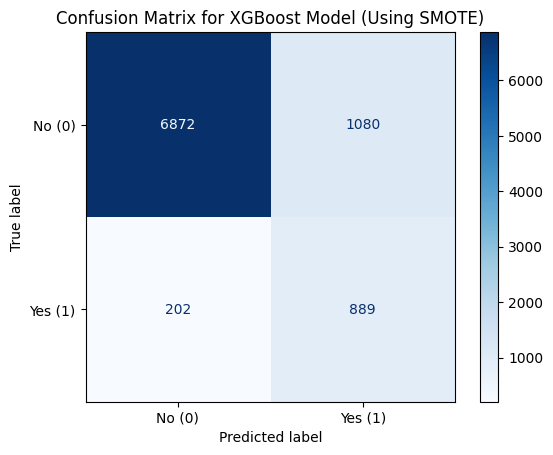

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Step 1: Calculate predicted probabilities for ROC curve
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Step 3: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No (0)", "Yes (1)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for XGBoost Model (Using SMOTE)")
plt.show()





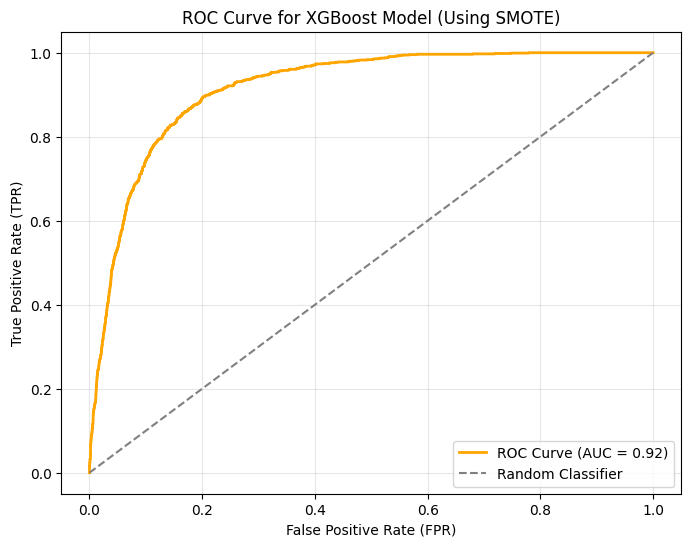

In [30]:
# Step 1: Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Step 2: Plot the ROC curve (orange color)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="orange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1.5, label="Random Classifier")
plt.title("ROC Curve for XGBoost Model (Using SMOTE)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Text(120.72222222222221, 0.5, 'Actual')

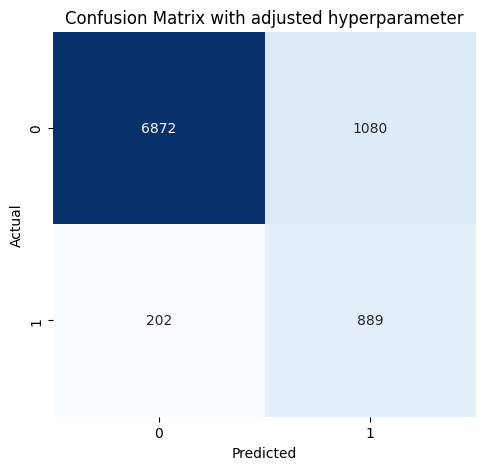

In [31]:
# Import necessary libraries for plotting and evaluation
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predicted probabilities for ROC curve
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix
plt.figure(figsize=(12, 5))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix with adjusted hyperparameter")
plt.xlabel("Predicted")
plt.ylabel("Actual")



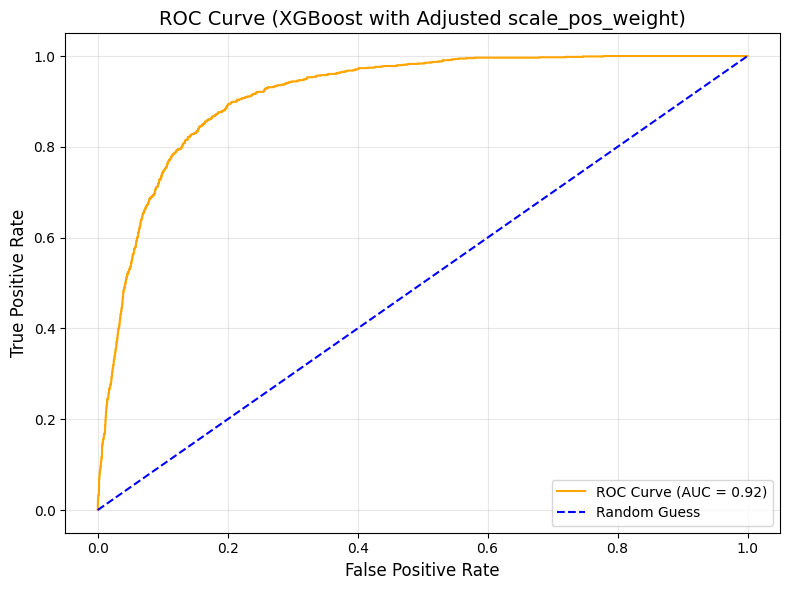

In [32]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))  # Adjust the figure size for better clarity
plt.plot(fpr, tpr, color="orange", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="blue", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve (XGBoost with Adjusted scale_pos_weight)", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



In [35]:
booster = xgb_model.get_booster()
